<div class="alert alert-info"><h1>Natural Language Processing with <code>NLTK</code>

In [72]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import requests
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from collections import Counter
import re
import spacy
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
def scrape_article(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    articles = []

    titles = soup.find_all('h1', class_='article-title')
    content_sections = soup.find_all('div', class_='font-m')


    for content in content_sections:
        article = {
            'Titel': [title.get_text(strip=True) for title in titles],
            'Content': content.get_text(strip=True)
        }

        articles.append(article)

    return articles

In [64]:
url = 'https://www.daikin-hbl.de/de/more/content/f%C3%BCchse-verpflichten-linksau%C3%9Fen-aitor-arino-kommt-zur-neuen-saison-nach-berlin-1'
articles = scrape_article(url)
df = pd.DataFrame(articles)
df.to_csv('arino-fuechse.csv', index=False, encoding='utf-8')
df.head()

,Titel,Content
0,[Füchse verpflichten Linksaußen: Aitor Arino k...,Aitor Arino wechselt im Sommer vom FC Barcelon...
1,[Füchse verpflichten Linksaußen: Aitor Arino k...,Da Jerry Tollbring die Füchse aus privater Ent...
2,[Füchse verpflichten Linksaußen: Aitor Arino k...,"Arino und der FC Barcelona, das ist eine ganz ..."
3,[Füchse verpflichten Linksaußen: Aitor Arino k...,Mit Spanien wurde der 89-malige Nationalspiele...
4,[Füchse verpflichten Linksaußen: Aitor Arino k...,Aitor Arino: „Ich wollte noch einmal in einem ...


In [75]:
stop_words = set(stopwords.words('german'))
#stemmer = SnowballStemmer("german")
nlp = spacy.load('de_core_news_sm')
text = ' '.join(df['Content'])

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text, language='german')
    tokens = [word for word in tokens if word not in stop_words]
    lemmatized_tokens = [nlp(word)[0].lemma_ for word in tokens]

    clean_text = ' '.join(lemmatized_tokens)

    return clean_text

clean = clean_text(text)

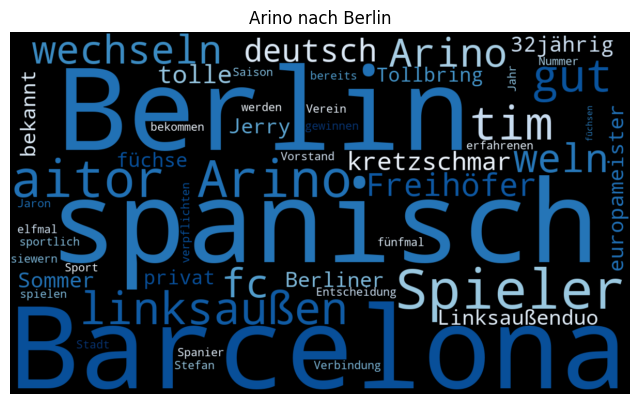

In [78]:
cloud = WordCloud(
    width=1200,
    height=700,
    background_color='black',
    max_words=50,
    colormap='Blues'
).generate(clean)


plt.figure(figsize=(8, 6))
plt.imshow(cloud, interpolation='bilinear')
plt.title("Arino nach Berlin")
plt.axis('off')
plt.show()